In [25]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [27]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [28]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=896ce3b6555721ab2b6f7a938ef1e61b


In [29]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=896ce3b6555721ab2b6f7a938ef1e61b&q=Boston


In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [32]:
coordinates

[(38.3226882597684, -135.37470372124548),
 (-37.70382638638498, -127.2480517898995),
 (87.14223260906635, -125.51369941856382),
 (56.709581762833835, -80.73489217144777),
 (-1.4261963028135085, 93.79224621503295),
 (71.69067950944344, -74.62120778106488),
 (9.02323758728177, -115.58715792350256),
 (50.322974683912065, -95.83379503373169),
 (-58.035124955322075, -43.84027166210984),
 (62.01003540066614, 45.24356921013538),
 (-23.033991112517512, -39.678337867056484),
 (71.94316939170926, 149.81768915599815),
 (-48.633868124734796, -104.17078902029597),
 (89.78825927619263, -179.29627620818283),
 (4.847413735681371, -29.594920043706168),
 (27.467650501752544, 75.36063965655902),
 (87.54325923032442, 88.43121544706526),
 (11.923030172244381, -144.43495805810858),
 (-35.617674132459896, 27.066780649359856),
 (48.092208875818784, -19.999661725315576),
 (-40.51405692645084, -148.79816354089337),
 (-51.18181789757793, 130.16629656005796),
 (-70.92517418272604, -126.60252984067843),
 (43.46876

In [33]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [34]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

# Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
# Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | sibolga
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | pinawa
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | dvinskoy
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 15 of Set 1 | sao filipe
Processing Record 16 of Set 1 | khandela
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | dingle
Processing Record 21 of Set 1 | mataura
Processing

Processing Record 37 of Set 4 | chabahar
Processing Record 38 of Set 4 | roma
Processing Record 39 of Set 4 | tilichiki
Processing Record 40 of Set 4 | kaeo
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | husavik
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | guane
Processing Record 45 of Set 4 | merauke
Processing Record 46 of Set 4 | nome
Processing Record 47 of Set 4 | umm kaddadah
Processing Record 48 of Set 4 | riyadh
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | high level
Processing Record 1 of Set 5 | saint-joseph
Processing Record 2 of Set 5 | gogrial
Processing Record 3 of Set 5 | saleaula
City not found. Skipping...
Processing Record 4 of Set 5 | ituacu
Processing Record 5 of Set 5 | vanimo
Processing Record 6 of Set 5 | yerbogachen
Processing Record 7 of Set 5 | kurumkan
Processing Record 8 of Set 5 | saint-georges
Processing Record 9 of Set 5 | vila velha
Processing Record 10 of Set 5 | talc

Processing Record 25 of Set 8 | balimo
City not found. Skipping...
Processing Record 26 of Set 8 | passo de camaragibe
Processing Record 27 of Set 8 | havelock
Processing Record 28 of Set 8 | baykit
Processing Record 29 of Set 8 | ust-koksa
Processing Record 30 of Set 8 | gobabis
Processing Record 31 of Set 8 | qianguo
Processing Record 32 of Set 8 | eyl
Processing Record 33 of Set 8 | erzin
Processing Record 34 of Set 8 | asau
Processing Record 35 of Set 8 | bajil
Processing Record 36 of Set 8 | quang ngai
Processing Record 37 of Set 8 | wukari
Processing Record 38 of Set 8 | klaksvik
Processing Record 39 of Set 8 | egvekinot
Processing Record 40 of Set 8 | jhikargachha
City not found. Skipping...
Processing Record 41 of Set 8 | port-gentil
Processing Record 42 of Set 8 | roald
Processing Record 43 of Set 8 | aloleng
Processing Record 44 of Set 8 | tautira
Processing Record 45 of Set 8 | bom jardim
Processing Record 46 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 

Processing Record 15 of Set 12 | gweta
Processing Record 16 of Set 12 | banjarmasin
Processing Record 17 of Set 12 | buala
Processing Record 18 of Set 12 | ballitoville
Processing Record 19 of Set 12 | kang
Processing Record 20 of Set 12 | cambyreta
City not found. Skipping...
Processing Record 21 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 22 of Set 12 | apiai
Processing Record 23 of Set 12 | maumere
Processing Record 24 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 25 of Set 12 | cozumel
Processing Record 26 of Set 12 | kenai
Processing Record 27 of Set 12 | russell
Processing Record 28 of Set 12 | talladega
Processing Record 29 of Set 12 | chaman
Processing Record 30 of Set 12 | teul
City not found. Skipping...
Processing Record 31 of Set 12 | tallahassee
Processing Record 32 of Set 12 | tezu
Processing Record 33 of Set 12 | kutum
Processing Record 34 of Set 12 | tombouctou
Processing Record 35 of Set 12 | nchelenge
Processing Record

In [36]:
len(city_data)


553

In [37]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.60,-124.16,45.00,89,0,3.00,US,2020-11-28 04:44:40
1,Rikitea,-23.12,-134.97,76.15,76,75,14.56,PF,2020-11-28 04:44:23
2,Tuktoyaktuk,69.45,-133.04,5.00,84,90,2.24,CA,2020-11-28 04:44:23
3,Sibolga,1.74,98.78,84.42,64,88,3.11,ID,2020-11-28 04:44:46
4,Clyde River,70.47,-68.59,-5.80,76,90,16.11,CA,2020-11-28 04:45:15
5,San Patricio,28.02,-97.52,75.99,88,90,3.36,US,2020-11-28 04:51:34
6,Pinawa,50.15,-95.88,28.94,97,95,7.16,CA,2020-11-28 04:51:34
7,Mar Del Plata,-38.00,-57.56,66.99,82,0,6.93,AR,2020-11-28 04:44:29
8,Dvinskoy,62.15,45.12,14.88,95,50,6.29,RU,2020-11-28 04:44:38
9,Sao Joao Da Barra,-21.64,-41.05,73.42,89,0,9.86,BR,2020-11-28 04:45:00


In [38]:
# formatting column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fortuna,US,2020-11-28 04:44:40,40.60,-124.16,45.00,89,0,3.00
1,Rikitea,PF,2020-11-28 04:44:23,-23.12,-134.97,76.15,76,75,14.56
2,Tuktoyaktuk,CA,2020-11-28 04:44:23,69.45,-133.04,5.00,84,90,2.24
3,Sibolga,ID,2020-11-28 04:44:46,1.74,98.78,84.42,64,88,3.11
4,Clyde River,CA,2020-11-28 04:45:15,70.47,-68.59,-5.80,76,90,16.11
5,San Patricio,US,2020-11-28 04:51:34,28.02,-97.52,75.99,88,90,3.36
6,Pinawa,CA,2020-11-28 04:51:34,50.15,-95.88,28.94,97,95,7.16
7,Mar Del Plata,AR,2020-11-28 04:44:29,-38.00,-57.56,66.99,82,0,6.93
8,Dvinskoy,RU,2020-11-28 04:44:38,62.15,45.12,14.88,95,50,6.29
9,Sao Joao Da Barra,BR,2020-11-28 04:45:00,-21.64,-41.05,73.42,89,0,9.86


In [39]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [40]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [41]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1606539937.5789628

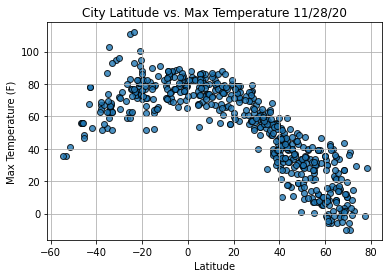

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

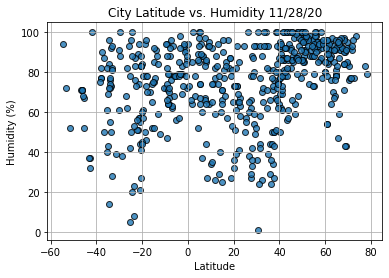

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

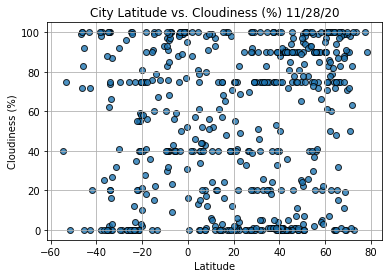

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

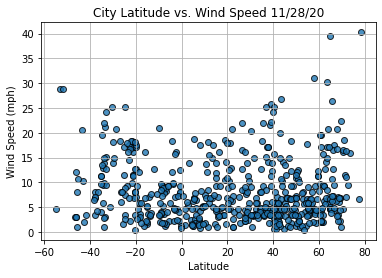

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()